## Adult Income Prediction  : Phase1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split

## Load Data

In [5]:
data = pd.read_csv('adult_cleaned.csv')

In [7]:
df = pd.DataFrame(data)

## Exploratory Data Analysis

In [10]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
df.shape

(32561, 15)

In [20]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [22]:
df.duplicated().sum()

24

#### Remove Duplicates

In [25]:
df.drop_duplicates(inplace = True)

In [27]:
df.duplicated().sum()

0

In [29]:
num_columns =df.select_dtypes(include = 'number')

In [31]:
num_columns

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [33]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [35]:
#drop unnecessary columns
df.drop(['fnlwgt'],axis =1, inplace = True )

#### Visualize Outliers through Boxplot

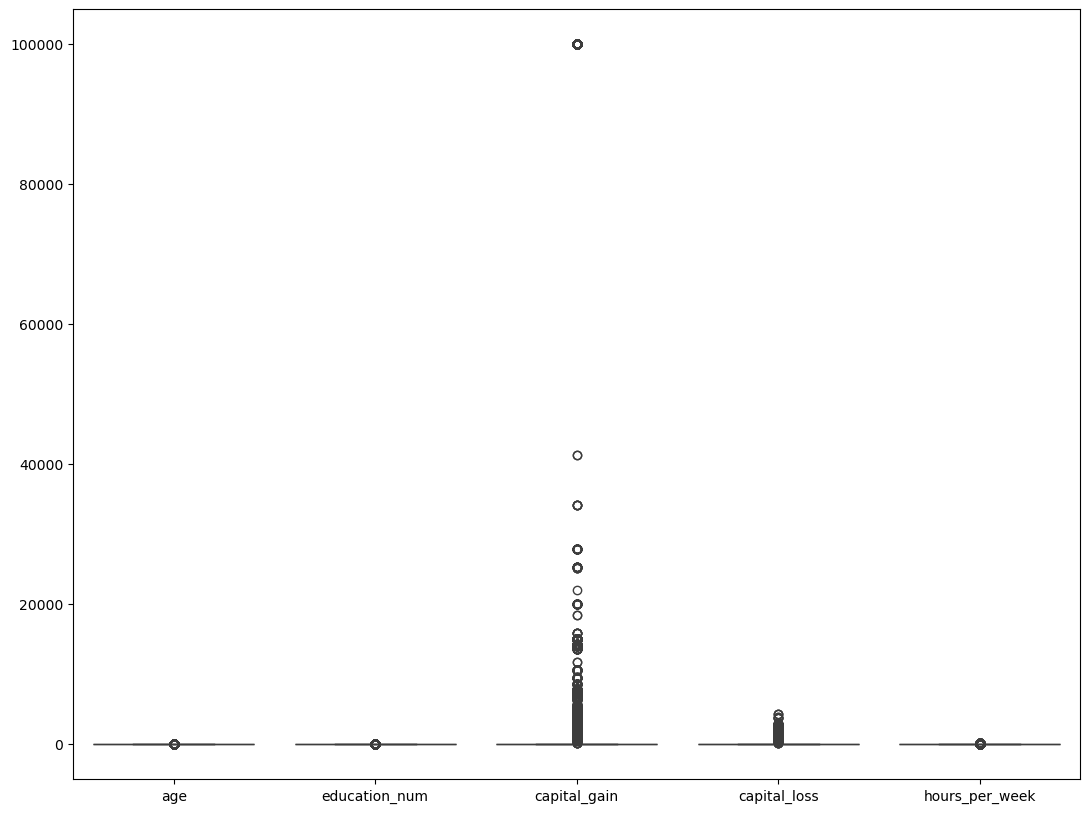

In [38]:
plt.figure(figsize=(13,10))
sns.boxplot(df)
plt.show()

In [40]:
def handling_outliers(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        q1= df[col].quantile(0.25)
        q3= df[col].quantile(0.75)
        iqr = q3 -q1
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)

#capping outliers
        df[col]=df[col].apply(lambda  x:lower if x < lower else upper if x > upper else x)

    return df

In [42]:
#change name for change outlier
df1 = handling_outliers(df)

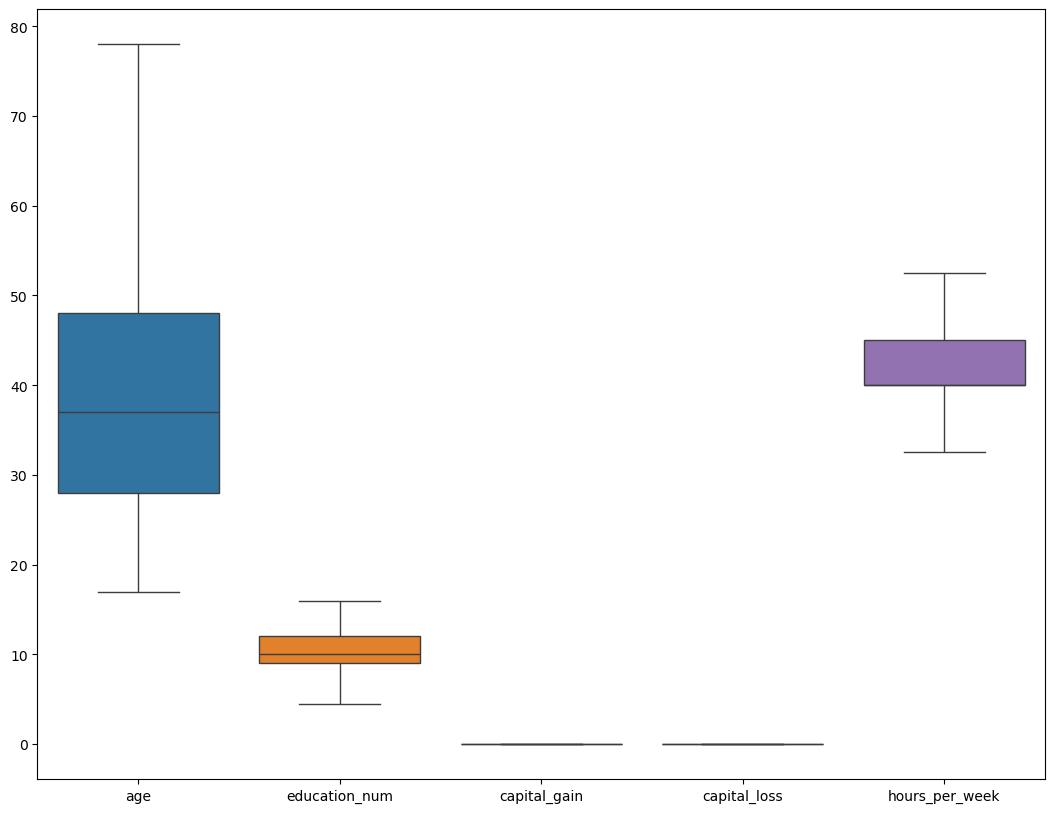

In [44]:
plt.figure(figsize=(13,10))
sns.boxplot(df1)
plt.show()

In [46]:
# Calculate skewness for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
skewness_values = df[numerical_features].skew()

In [48]:
# Print or use the skewness values
skewness_values

age               0.513435
education_num    -0.033530
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.438212
dtype: float64

<Axes: ylabel='Count'>

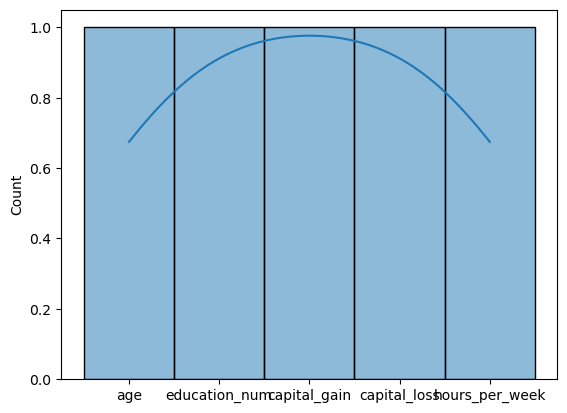

In [50]:
sns.histplot(data = numerical_features, kde = True)

## Visualization

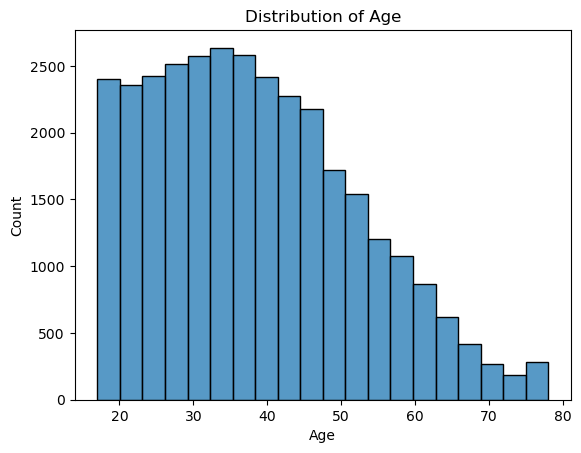

In [53]:
sns.histplot(df1['age'], bins = 20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

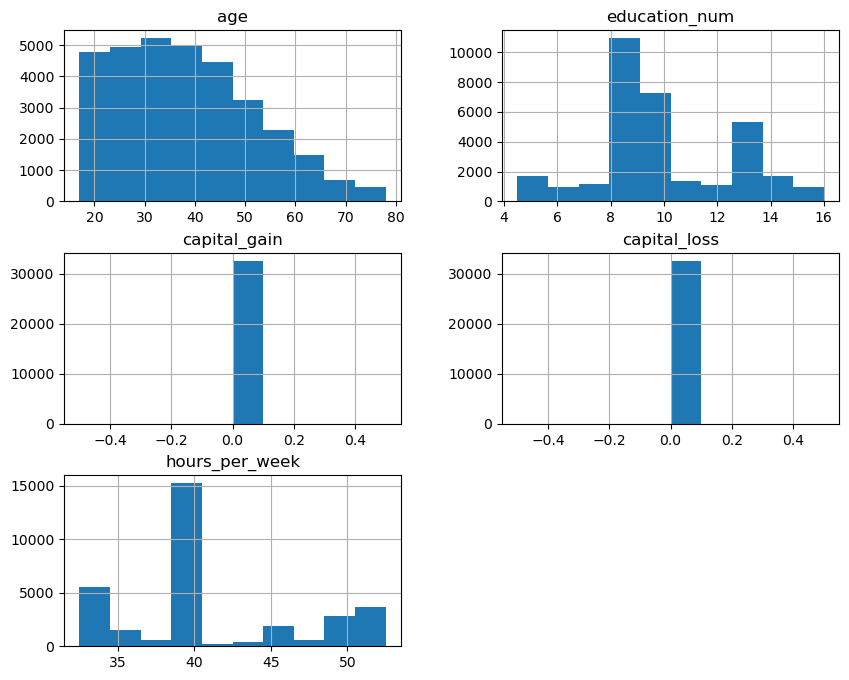

In [55]:
df1.hist(figsize=(10,8))
plt.show()

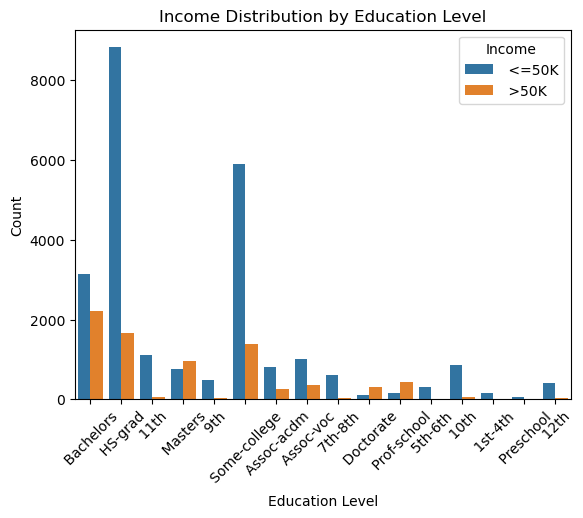

In [57]:
# Visualize the income distribution by education level
sns.countplot(x = 'education', hue = 'income', data = df1)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title = 'Income', loc='upper right')
plt.show()

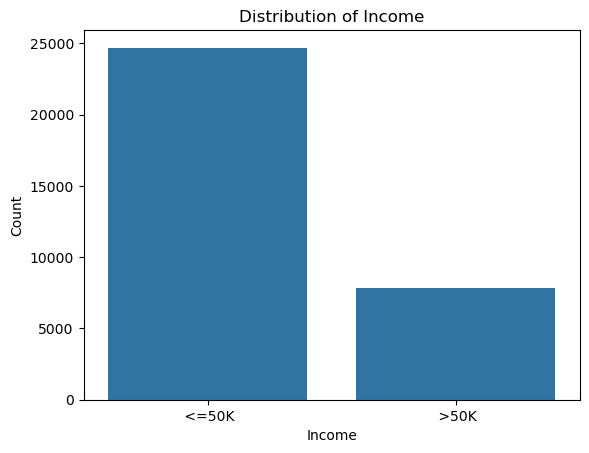

In [59]:
#visualize the distribution of income
sns.countplot(x = 'income',data = df1)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

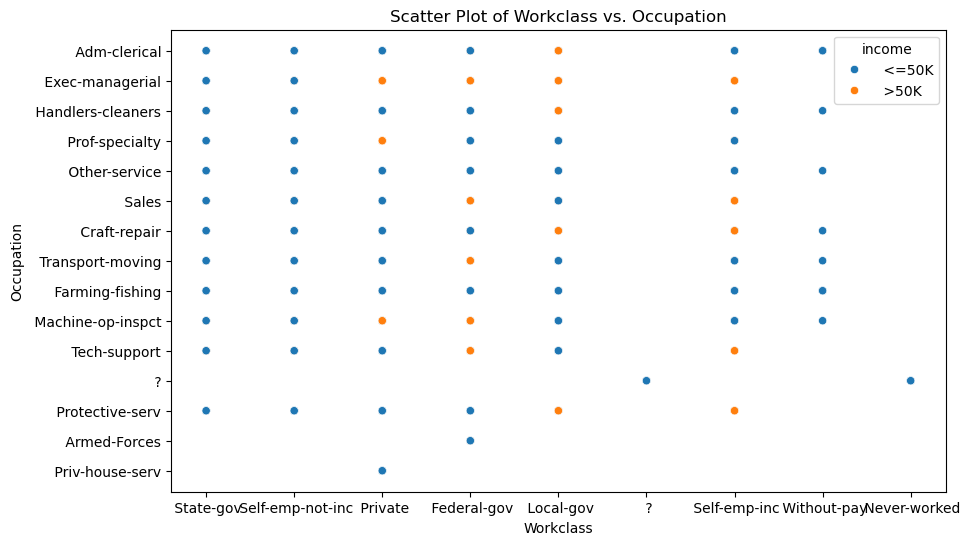

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='workclass', y='occupation', data=df, hue='income')
plt.title('Scatter Plot of Workclass vs. Occupation')
plt.xlabel('Workclass')
plt.ylabel('Occupation')
plt.show()

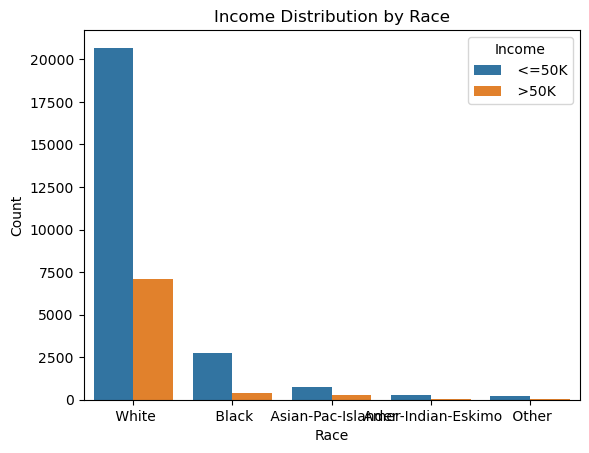

In [63]:
#visualize the income distribution by race
sns.countplot(x = 'race', hue='income', data = df1)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income', loc = 'upper right')
plt.show()

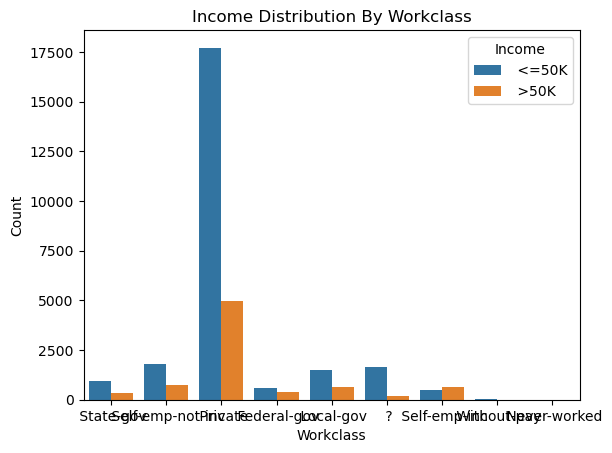

In [65]:
#Visualize the income distribution by workclass
sns.countplot(x = 'workclass', hue = 'income', data = df1)
plt.title('Income Distribution By Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title ='Income', loc ='upper right')
plt.show()

## Label Encoding

In [70]:
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])


## Scale the data using StandardScaler

In [73]:
#Feature Scaling
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [75]:
#Split data into features and target
X = data.drop('income', axis = 1)
y = data['income']

## Splitting

In [78]:
#Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [88]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

In [90]:
print(correlation_matrix)

                     age  workclass    fnlwgt  education  education_num  \
age             1.000000   0.004615 -0.073580  -0.005654       0.038749   
workclass       0.004615   1.000000 -0.015810   0.031097       0.055082   
fnlwgt         -0.073580  -0.015810  1.000000  -0.034105      -0.041892   
education      -0.005654   0.031097 -0.034105   1.000000       0.358946   
education_num   0.038749   0.055082 -0.041892   0.358946       1.000000   
marital_status -0.267700  -0.064170  0.032560  -0.039890      -0.071960   
occupation     -0.022075   0.252607  0.000529  -0.022093       0.106557   
relationship   -0.268453  -0.090721  0.010562  -0.015036      -0.095728   
race            0.027998   0.056271 -0.018715   0.016832       0.032338   
sex             0.089687   0.093693  0.025461  -0.020755       0.016599   
capital_gain    0.079644   0.029451  0.001656   0.029710       0.123857   
capital_loss    0.056354   0.012455 -0.010029   0.017050       0.083419   
hours_per_week  0.074627 

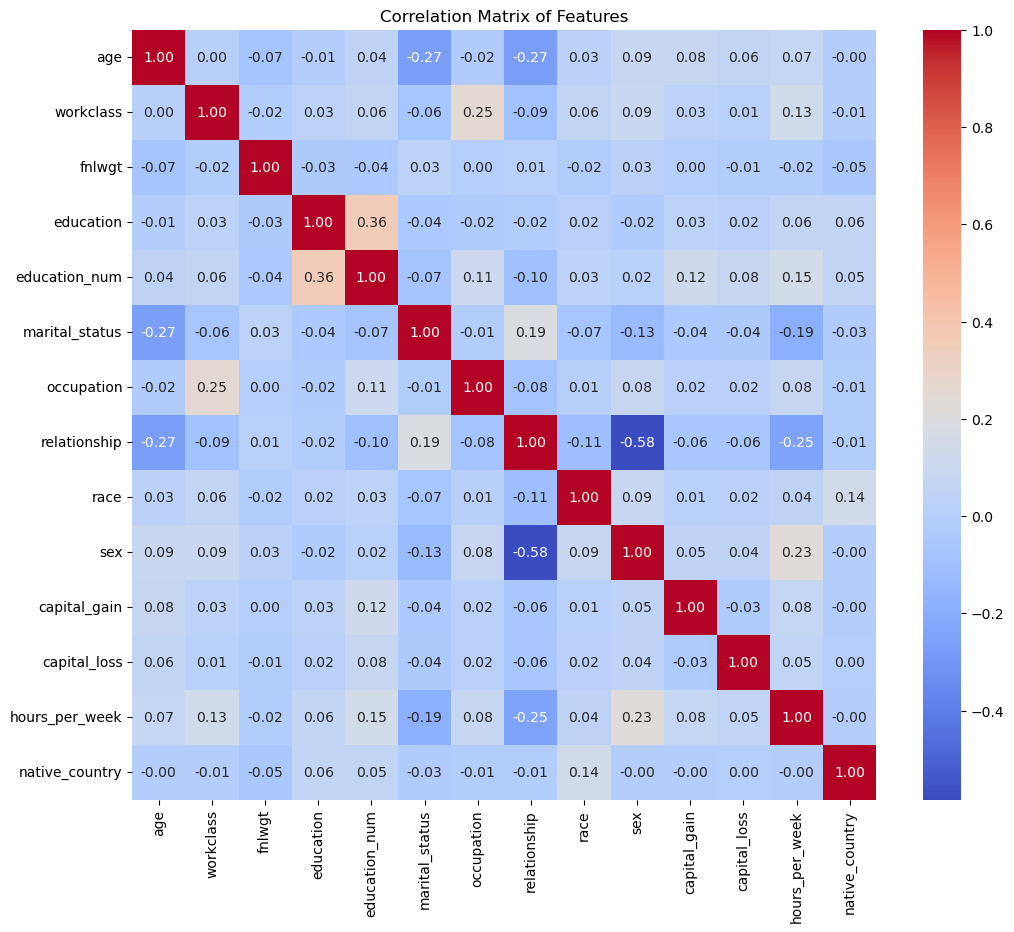

In [92]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## Feature Selection

### SelectKBest

In [96]:
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [98]:
#Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))  

             Specs        Score
4    education_num  3248.948189
7     relationship  1731.251601
0              age  1532.360386
12  hours_per_week  1449.563730
10    capital_gain  1356.638827
9              sex  1280.050989
5   marital_status  1095.826285
11    capital_loss   579.441272
3        education   160.063145
6       occupation   148.137508
